In [1]:
# 手写数字
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

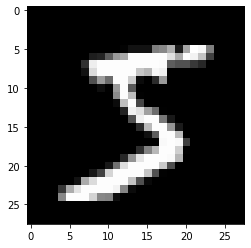

In [9]:
plt.imshow(x_train[0], cmap='gray')

In [8]:
y_train[0]

5

In [10]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [39]:
# 神经网络训练数据是二维的, (batch_size, 特征数)
# 对数据进行预处理
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# 独热编码
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

In [12]:
y_train.shape

(60000, 10)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
from tensorflow.keras.layers import Dense

In [40]:
# 定义神经网络
model = tf.keras.Sequential()
# 神经元的个数一般给2的幂次方
# 神经网络的第一层网络, 要接受输入, 需要指定一下输入数据的维度. input_shape, 必须是个元组. 
model.add(Dense(64, activation='relu', input_shape=(784, )))
# 另一种写法
# model.add(Dense(64, activation='relu', input_dim=784))

model.add(Dense(64, activation='relu'))
# 输出层多分类激活函数一般使用softmax
model.add(Dense(10, activation='softmax'))


In [18]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# 不用独热编码
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
938 * 64

60032

In [42]:
# 神经网络训练是分批训练. epoch,完整遍历整个数据才算一次epoch训练. 
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.9661 - accuracy: 0.7433 - val_loss: 0.4232 - val_accuracy: 0.8820
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3790 - accuracy: 0.8923 - val_loss: 0.3178 - val_accuracy: 0.9066
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3138 - accuracy: 0.9101 - val_loss: 0.2799 - val_accuracy: 0.9185
Epoch 4/20
938/938 [==============================] - 3s 4ms/step - loss: 0.2810 - accuracy: 0.9190 - val_loss: 0.2566 - val_accuracy: 0.9264
Epoch 5/20
938/938 [==============================] - 3s 4ms/step - loss: 0.2576 - accuracy: 0.9257 - val_loss: 0.2411 - val_accuracy: 0.9289
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2395 - accuracy: 0.9309 - val_loss: 0.2232 - val_accuracy: 0.9343
Epoch 7/20
938/938 [==============================] - 3s 4ms/step - loss: 0.2237 - accuracy: 0.9353 - val_loss: 0.2082 - val_accuracy: 0.9397
Epoch 

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 评估
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0966 - accuracy: 0.9708


[0.09663257747888565, 0.97079998254776]

In [28]:
model.predict(x_test[:32])[0].argmax()

1/1 [==============================] - 0s 13ms/step


7

In [29]:
# 保存模型
# HDF5格式: 分层的存储的文件格式. 
model.save('./model.h5')

In [30]:
# 加载模型
model2 = tf.keras.models.load_model('./model.h5')

In [31]:
model2.predict(x_test[:32])[0].argmax()

1/1 [==============================] - 0s 37ms/step


7